### Background
Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments. Upon enrolling in Freedom’s Debt Relief program, customers cease making payments to their creditors and instead make deposits they can afford into a new dedicated bank account with Freedom. Freedom uses these funds to negotiate with each of the client’s creditors to settle the debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement. Freedom then collects fees from the client for the individual account that was settled. Freedom earns fees for each account it successfully negotiates a settlement agreement. The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount. Assume industry statistics for any analysis input that you would want to use that is not provided here, including but not limited to fee percentage Freedom would collect along with ongoing cost per client between initial enrollment and program graduation.

### Assignment
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

### Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?
2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?
3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

### Metrics for Success
1. **Cost per Acquisition (CPA)**: The cost per acquisition is the cost of converting a customer. It is calculated by dividing the total cost of the campaign by the number of customers acquired. The lower the CPA, the more successful the campaign.
2. **Return on Investment (ROI)**: The return on investment is the ratio between the net profit and the cost of the campaign. It is calculated by subtracting the cost of the campaign from the revenue generated and dividing the result by the cost of the campaign. The higher the ROI, the more successful the campaign.
3. **Customer Lifetime Value (CLV)**: The customer lifetime value is the total revenue generated by a customer over the entire duration of their relationship with the company. It is calculated by multiplying the average revenue per customer by the average customer lifespan. The higher the CLV, the more successful the campaign.

### Data Description

client_data.csv: You will find data specific to the client
* client_id: Randomly generated unique surrogate identifier for a client
* client_geographical_region: Client geographical location in relation to U.S. Census definitions
* client_residence_status: Client residence status in relation to whether they rent or own
* client_age: Client age in relation to date of birth

deposit_data.csv: You will find data specific to the client deposit behavior
* client_id: Randomly generated unique surrogate identifier for a client
* deposit_type: Delineates whether a client deposit is the scheduled record or actual record
* deposit_amount: Client deposit amount to the dedicated bank account with Freedom
* deposit_cadence: Timing and pattern of client deposit activity
* deposit_date: Deposit date for deposit type
calendar_data.csv: This is a calendar reference table
* gregorian_date: This date aligns with the Gregorian calendar
* month_name: These are the designated months in the case study
    * Month 1 and 2 are pre-campaign
    * Month 3 is the campaign
    * Month 4 and 5 are post-campaign

### Sub metrics
1. **Fee percentage**: The fee percentage is the percentage of the total debt amount that Freedom Debt Relief collects as fees for negotiating a settlement agreement. It is calculated by dividing the total fees collected by the total debt amount. The higher the fee percentage, the more successful the campaign.
2. **Ongoing cost per client**: The ongoing cost per client is the cost of servicing a client from initial enrollment to program graduation. It is calculated by dividing the total cost of servicing clients by the number of clients serviced. The lower the ongoing cost per client, the more successful the campaign.
3. **Settlement rate**: The settlement rate is the percentage of accounts that Freedom Debt Relief successfully negotiates a settlement agreement for. It is calculated by dividing the number of accounts settled by the total number of accounts. The higher the settlement rate, the more successful the campaign.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.fdr_helper import get_campaign_time
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# df_client_data = pd.read_csv('datasets/freedom_debt_relief/client_data.csv')
# print(f'Client data shape: {df_client_data.shape}')
# df_client_data.head(2)
# # probably not useful for our analysis

In [3]:
df_deposit_data = pd.read_csv('datasets/freedom_debt_relief/deposit_data.csv')
print(f'Deposit data shape: {df_deposit_data.shape}')
df_calendar_data = pd.read_csv('datasets/freedom_debt_relief/calendar_data.csv')
print(f'Calendar data shape: {df_calendar_data.shape}')

df_deposit_data_calendar = pd.merge(df_deposit_data, df_calendar_data, left_on='deposit_date', right_on='gregorian_date',)
# drop 'gregorian_date' column
df_deposit_data_calendar.drop(columns=['gregorian_date'], inplace=True)

print(f'Deposit data calendar shape: {df_deposit_data_calendar.shape}')
# df_deposit_data_calendar['gregorian_date'] = pd.to_datetime(df_deposit_data_calendar['gregorian_date'])
df_deposit_data_calendar['deposit_date'] = pd.to_datetime(df_deposit_data_calendar['deposit_date'])
df_deposit_data_calendar['client_id'] = df_deposit_data_calendar['client_id'].astype(str)
df_deposit_data_calendar['campaign_timing'] = df_deposit_data_calendar['month_name'].apply(lambda x: get_campaign_time(x))
df_deposit_data_calendar.head(2)

Deposit data shape: (480394, 5)
Calendar data shape: (153, 2)
Deposit data calendar shape: (480394, 6)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,campaign_timing
0,446495122764671,Actual Deposit,303.00,Monthly,2019-10-23,Month 5,postcampaign
1,446495122764671,Actual Deposit,303.00,Monthly,2019-09-23,Month 4,postcampaign


In [4]:
tmp_df = df_deposit_data_calendar.groupby(['month_name', 'deposit_type'])['deposit_amount'].sum()
tmp_df.unstack()

deposit_type,Actual Deposit,Scheduled Deposit
month_name,,
Month 1,14290184.25,14994646.61
Month 2,14653623.58,15232807.69
Month 3,19524393.05,20150664.05
Month 4,18951569.18,19564250.55
Month 5,18657678.80,19423496.43


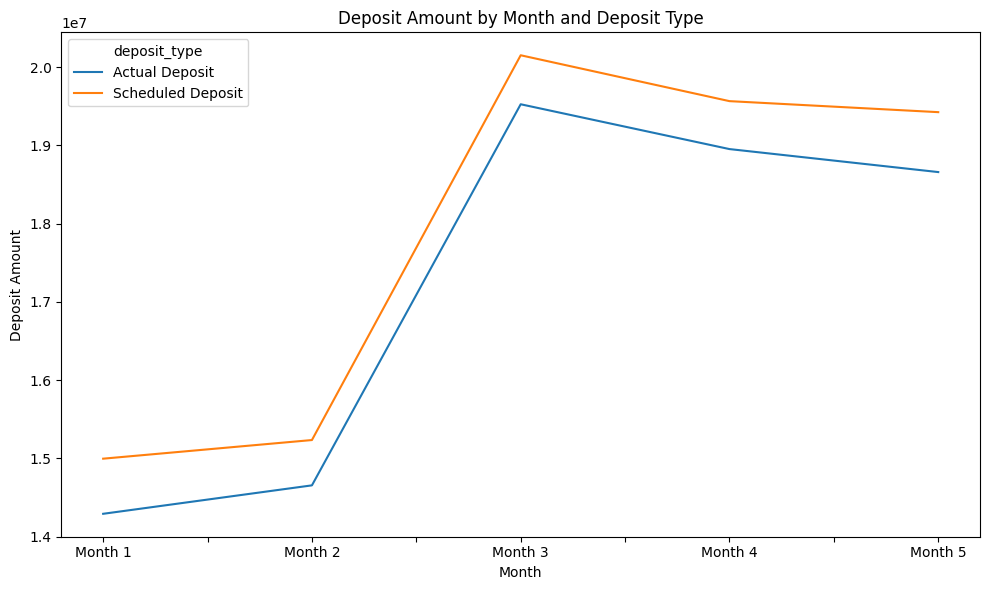

In [5]:
tmp_df = df_deposit_data_calendar.groupby(['month_name', 'deposit_type'])['deposit_amount'].sum()
# visualize with a line plot
ax = tmp_df.unstack().plot(kind='line', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Deposit Amount')
ax.set_title('Deposit Amount by Month and Deposit Type')
plt.tight_layout()

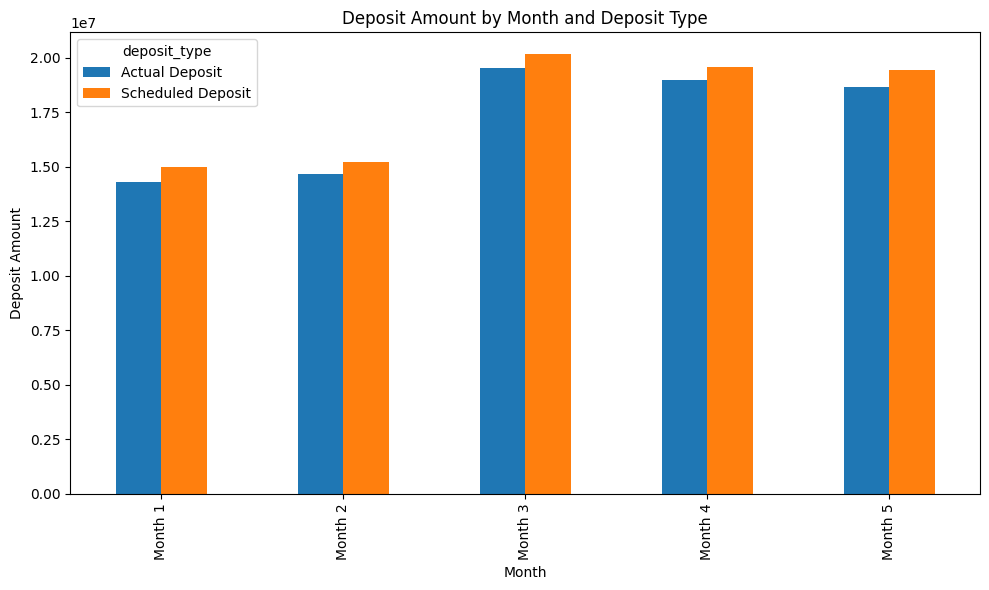

In [9]:
df_month_deposit = df_deposit_data_calendar.groupby(['month_name', 'deposit_type'])['deposit_amount'].sum()
# visualize with a bar plot
ax = df_month_deposit.unstack().plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Deposit Amount')
ax.set_title('Deposit Amount by Month and Deposit Type')
plt.tight_layout()

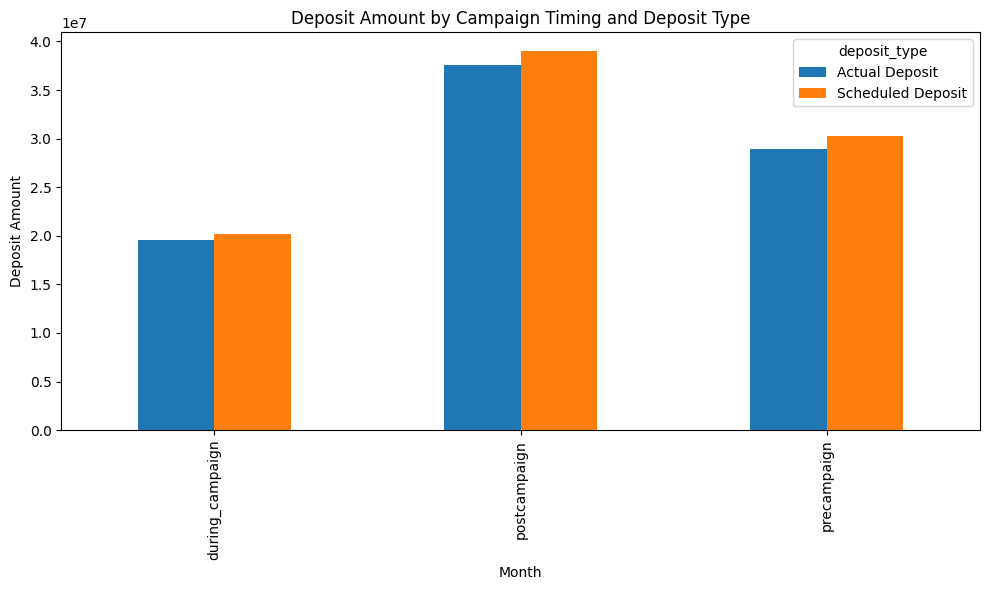

In [10]:
df_campaign_timing_deposit = df_deposit_data_calendar.groupby(['campaign_timing', 'deposit_type'])['deposit_amount'].sum()
# visualize with a bar plot
ax = df_campaign_timing_deposit.unstack().plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Deposit Amount')
ax.set_title('Deposit Amount by Campaign Timing and Deposit Type')
plt.tight_layout()

In [20]:
df_campaign_timing_deposit_unstacked = df_campaign_timing_deposit.unstack().copy(deep=True)
df_campaign_timing_deposit_unstacked

deposit_type,Actual Deposit,Scheduled Deposit
campaign_timing,,
during_campaign,19524393.05,20150664.05
postcampaign,37609247.98,38987746.98
precampaign,28943807.83,30227454.30


In [31]:
rvnue_frm_frst_mnth_cmpgn = df_month_deposit.unstack().loc['Month 3', 'Actual Deposit'] - df_month_deposit.unstack().loc['Month 2', 'Actual Deposit']
f"Revenue growth from first month of campaign: ${rvnue_frm_frst_mnth_cmpgn:,.2f}"

'Revenue growth from first month of campaign: $4,870,769.47'

In [32]:
# mnthly_rvnue_frm_cmpgn = ((df_campaign_timing_deposit_unstacked.loc['postcampaign', 'Actual Deposit'] + df_campaign_timing_deposit_unstacked.loc['during_campaign', 'Actual Deposit'])/3) - (df_campaign_timing_deposit_unstacked.loc['precampaign', 'Actual Deposit'] /2)
# f"Monthly additional revenue correlated with campaign in first month: ${mnthly_rvnue_frm_cmpgn:,.2f}"

In [33]:
slp_of_dclnng_rvnue_frm_cmpgn = (df_month_deposit.unstack().loc['Month 3', 'Actual Deposit'] - df_month_deposit.unstack().loc['Month 4', 'Actual Deposit'] + df_month_deposit.unstack().loc['Month 4', 'Actual Deposit'] - df_month_deposit.unstack().loc['Month 5', 'Actual Deposit'])/2
f"Slope of declining revenue after month 3: ${slp_of_dclnng_rvnue_frm_cmpgn:,.2f}"

'Slope of declining revenue after month 3: $433,357.12'

In [34]:
mnths_till_rtrn_to_baseline = rvnue_frm_frst_mnth_cmpgn / slp_of_dclnng_rvnue_frm_cmpgn
f"Months till return to baseline: {mnths_till_rtrn_to_baseline:,.2f} months"

'Months till return to baseline: 11.24 months'

Total = (n/2) * (x + max(0,x-(n-1)y))
where n is the number of months, x is the number of months after the campaign, and y is the number of months before the campaign.

In [37]:
# Given values
x = 4870769.47  # Initial amount
y = 433357.12   # Amount reduced each month
n = 12          # Number of months

# Calculate the total using the arithmetic series formula
total = (n / 2) * ( + max(0, x - (n - 1) * y))
# total = (rvnue_frm_frst_mnth_cmpgn / 2) * ( + max(0, rvnue_frm_frst_mnth_cmpgn - (rvnue_frm_frst_mnth_cmpgn - 1) * slp_of_dclnng_rvnue_frm_cmpgn))
total


623046.8999999966

In [27]:
mnthly_rvnue_bfr_cmpgn = df_campaign_timing_deposit_unstacked.loc['precampaign', 'Actual Deposit'] / 2
f"Monthly revenue before campaign: ${mnthly_rvnue_bfr_cmpgn:,.2f}"

'Monthly revenue before campaign: $14,471,903.91'

### Calculate number of customers acquired

In [15]:
df_customer_acquisition = df_deposit_data_calendar.copy(deep=True)
df_customer_acquisition = df_customer_acquisition[df_customer_acquisition['deposit_type'] == 'Scheduled Deposit'] # 'Actual Deposit'
# sort by client_id and deposit_date
df_customer_acquisition.sort_values(by=['client_id', 'deposit_date'], inplace=True)
df_customer_acquisition.reset_index(drop=True, inplace=True)
df_customer_acquisition.head(20)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,campaign_timing
0,100000231061553,Scheduled Deposit,364.00,Monthly,2019-06-04,Month 1,precampaign
1,100000231061553,Scheduled Deposit,364.00,Monthly,2019-07-04,Month 2,precampaign
2,100037930064845,Scheduled Deposit,1090.00,Monthly,2019-08-11,Month 3,during_campaign
3,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-06-07,Month 1,precampaign
4,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-06-21,Month 1,precampaign
5,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-07-05,Month 2,precampaign
6,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-07-19,Month 2,precampaign
7,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-08-13,Month 3,during_campaign
8,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-08-13,Month 3,during_campaign
9,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-08-27,Month 3,during_campaign


In [21]:
# Find the index of the row with the earliest deposit_date in each group
idx = df_customer_acquisition.groupby('client_id')['deposit_date'].idxmin()
df_customer_acquisition_min = df_customer_acquisition.loc[idx, ] # ['client_id', 'deposit_type', 'deposit_amount', 'deposit_cadence', 'deposit_date', 'campaign_timing']
df_customer_acquisition_min.reset_index(drop=True, inplace=True)
# change name of 'deposit_date' to 'customer_acquisition_date'
df_customer_acquisition_min.rename(columns={'deposit_date': 'customer_acquisition_date'}, inplace=True)
# df_deposit_data_calendar_grouped = df_deposit_data_calendar.groupby('client_id').aggregate({'deposit_amount': 'sum'}) # , 'deposit_date': 'count'
# df_customer_acquisition_min = df_customer_acquisition_min.merge(df_deposit_data_calendar_grouped, on='client_id')
# df_customer_acquisition_min.rename(columns={'deposit_amount': 'total_deposit_amount'}, inplace=True)
df_customer_acquisition_min.head()


,client_id,deposit_type,deposit_amount,deposit_cadence,customer_acquisition_date,month_name,campaign_timing
0,100000231061553,Scheduled Deposit,364.00,Monthly,2019-06-04,Month 1,precampaign
1,100037930064845,Scheduled Deposit,1090.00,Monthly,2019-08-11,Month 3,during_campaign
2,10006866047424,Scheduled Deposit,129.00,Biweekly,2019-06-07,Month 1,precampaign
3,100085423724172,Scheduled Deposit,790.00,Monthly,2019-06-15,Month 1,precampaign
4,100126210029665,Scheduled Deposit,904.00,Biweekly,2019-06-07,Month 1,precampaign


In [25]:
df_customer_acquisition_min.groupby('campaign_timing')['client_id'].count()

campaign_timing
during_campaign    11239
postcampaign         521
precampaign        33196
Name: client_id, dtype: int64

In [12]:
# # Find the index of the row with the latest deposit_date in each group
# idx = df_customer_acquisition.groupby('client_id')['deposit_date'].idxmax()
# df_customer_acquisition_max = df_customer_acquisition.loc[idx, ['client_id', 'deposit_type', 'deposit_cadence', 'deposit_date', 'campaign_timing']]
# df_customer_acquisition_max.reset_index(drop=True, inplace=True)
# # change name of 'deposit_date' to 'customer_acquisition_date'

In [27]:
df_campaign_timing_min_count_client

,client_id
campaign_timing,
during_campaign,11239
postcampaign,521
precampaign,33196


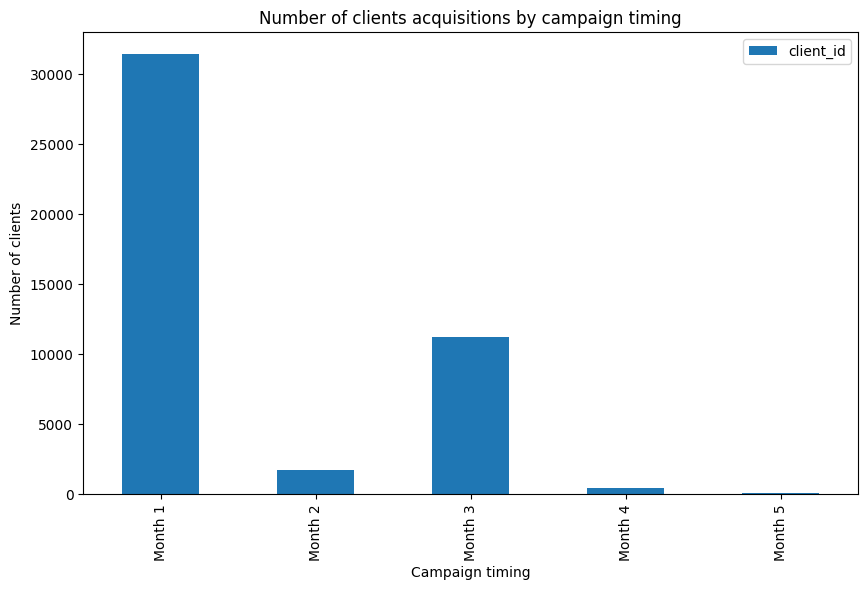

In [32]:
df_campaign_timing_min_count_client = df_customer_acquisition_min.groupby('month_name').aggregate({'client_id': 'count'})
# visualize df_campaign_timing_grouped
df_campaign_timing_min_count_client.plot(kind='bar', figsize=(10, 6))
plt.title('Number of clients acquisitions by campaign timing')
plt.xlabel('Campaign timing')
plt.ylabel('Number of clients')
plt.show()